In [1]:
#@author Sebastian Flores
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('titanic.csv')
df = pd.DataFrame(data)
df5 = df.head(5)
df5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
new_df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
new_df = new_df.replace({'Sex': {'female': 0, 'male': 1}})
new_df.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [5]:
new_df.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Survived      int64
dtype: object

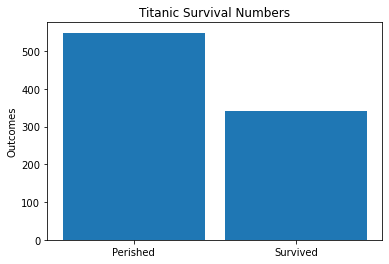

In [6]:
counts = new_df['Survived'].value_counts()
w = 0.35

plt.bar(x=[0, .4], height=counts, width=w)
plt.title("Titanic Survival Numbers")
plt.ylabel("Outcomes")
plt.xticks([0,0.4], ("Perished", "Survived"))
plt.show()

In [7]:
new_df.mean()

Pclass       2.308642
Sex          0.647587
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
Survived     0.383838
dtype: float64

In [8]:
new_df.groupby(new_df['Survived']).mean()

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408


In [9]:
means = new_df.groupby(new_df['Survived']).mean()
avgP = means.iloc[0,:]
avgS = means.iloc[1,:]
avgT = new_df.iloc[:, :6].mean()
print(avgP)
print(avgS)

Pclass     2.531876
Sex        0.852459
Age       30.626179
SibSp      0.553734
Parch      0.329690
Fare      22.117887
Name: 0, dtype: float64
Pclass     1.950292
Sex        0.318713
Age       28.343690
SibSp      0.473684
Parch      0.464912
Fare      48.395408
Name: 1, dtype: float64


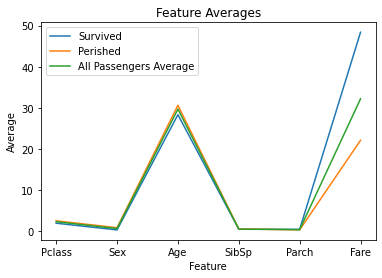

In [10]:
plt.plot(avgS, label='Survived')
plt.plot(avgP, label='Perished')
plt.plot(avgT, label='All Passengers Average')
plt.ylabel('Average')
plt.xlabel('Feature')
plt.title('Feature Averages')
plt.legend()
plt.show()

Text(0.5, 0.98, 'Feature Averages - A Closer Look')

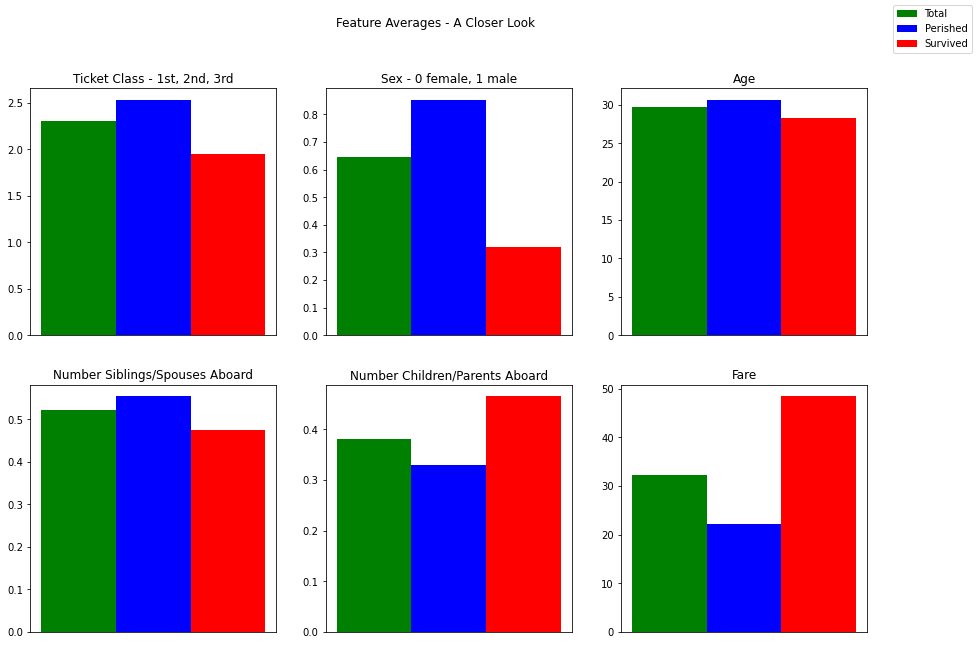

In [11]:
w = 0.2
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
avgtt=ax[0,0].bar(x=0, height=avgT[0], width=w, color='green', label='Total')
avgpt=ax[0,0].bar(x=w, height=avgP[0], width=w, color='blue', label='Perished')
avgst=ax[0,0].bar(x=w+w, height=avgS[0], width=w, color='red', label='Survived')
ax[0,0].axes.xaxis.set_visible(False)
ax[0,0].set_title('Ticket Class - 1st, 2nd, 3rd')

ax[0,1].bar(x=0, height=avgT[1], width=w, color='green')
ax[0,1].bar(x=w, height=avgP[1], width=w, color='blue')
ax[0,1].bar(x=w+w, height=avgS[1], width=w, color='red')
ax[0,1].axes.xaxis.set_visible(False)
ax[0,1].set_title('Sex - 0 female, 1 male')

ax[0,2].bar(x=0, height=avgT[2], width=w, color='green')
ax[0,2].bar(x=w, height=avgP[2], width=w, color='blue')
ax[0,2].bar(x=w+w, height=avgS[2], width=w, color='red')
ax[0,2].axes.xaxis.set_visible(False)
ax[0,2].set_title('Age')

ax[1,0].bar(x=0, height=avgT[3], width=w, color='green')
ax[1,0].bar(x=w, height=avgP[3], width=w, color='blue')
ax[1,0].bar(x=w+w, height=avgS[3], width=w, color='red')
ax[1,0].axes.xaxis.set_visible(False)
ax[1,0].set_title('Number Siblings/Spouses Aboard')

ax[1,1].bar(x=0, height=avgT[4], width=w, color='green')
ax[1,1].bar(x=w, height=avgP[4], width=w, color='blue')
ax[1,1].bar(x=w+w, height=avgS[4], width=w, color='red')
ax[1,1].axes.xaxis.set_visible(False)
ax[1,1].set_title('Number Children/Parents Aboard')

ax[1,2].bar(x=0, height=avgT[5], width=w, color='green')
ax[1,2].bar(x=w, height=avgP[5], width=w, color='blue')
ax[1,2].bar(x=w+w, height=avgS[5], width=w, color='red')
ax[1,2].axes.xaxis.set_visible(False)
ax[1,2].set_title('Fare')
fig.legend(handles=[avgtt, avgpt, avgst])
fig.suptitle('Feature Averages - A Closer Look')

In [20]:
#Get correlation between each feature and the dependent variable
print(new_df['Pclass'].corr(new_df['Survived']))
print(new_df['Sex'].corr(new_df['Survived']))
print(new_df['Age'].corr(new_df['Survived']))
print(new_df['SibSp'].corr(new_df['Survived']))
print(new_df['Parch'].corr(new_df['Survived']))
print(new_df['Fare'].corr(new_df['Survived']))

-0.33848103596101486
-0.5433513806577545
-0.07722109457217761
-0.03532249888573558
0.08162940708348353
0.2573065223849622


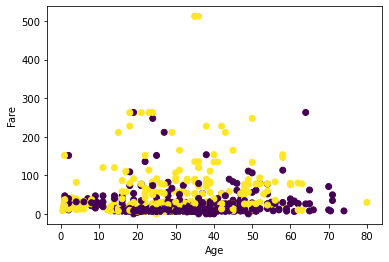

In [12]:
plt.scatter(new_df['Age'], new_df['Fare'], c=df['Survived'], cmap='viridis')
plt.ylabel("Fare")
plt.xlabel('Age')
plt.show()